# 알고리즘 : Naive Bayes
### 미션 : 스팸문자, 문장에 들어간 단어들을 활용해 스팸인지 아닌지 예측
### 종속 변수 : target(스팸여부)
### 평가 지표 : 정확도, 혼동 행렬
### 문제 유형 : 분류(classification)

지도학습 알고리즘 3
나이브 베이즈 
학습 순서
1. 문제정의 -> 2. 라이브러리 및 데이터 불러오기 -> 3. 전처리: a. 특수기호 제거 b. 불용어 제거 c. 목표컬럼 형태 변경하기 d. 카운트 기반으로 벡터화하기 -> 4. 데이터 모델링 및 예측하기 -> 5. 이해하기 (나이브 베이즈 분류)

정의 : 베이즈 정리를 적용한 조건부 확률 기반의 분류 모델.
    - 조건부 확률은 A가 일어났을 때 B가 일어날 확률. 
    - 예를들어 "무료"라고 단어가 들어 있을때 해당 메일이 스팸일 확률
    - 최근 딥러닝 때문에 많이 사용되지 않기도 하지만, 아직 까지는 나쁘지 않음 (딥러닝이 자연어 처리에 더 탁월한 모습을 보이지만, 딥러닝 보다 간단한 방법으로 자연어 처리 가능)
    - 독립변수들이 모두 독립적이라면 충분히 경쟁력 있음. 

장점 : 비교적 간단한 알고리즘에 속하며 속도 또한 빠름. 
      작은 훈련셋으로도 잘 예측
단점 : 모든 독립변수가 각각 독립적임을 전제로 하는데 이는 장점이면서 단점이기도 함. 실제로 독립변수들이 모두 독립적이면 다른 알고리즘보다 우수할수 있지만, 실데 그런경우는 겨의 없음.   

유용한 곳 : 1. 각 독립변수들이 모두 독립적이고, 그 중요도가 비슷할 때 
          2. 자연어 처리
          3. 범주형태의 변수가 많을 때 적합. 숫자형 변수가 많은 때는 비 적합

7.2 라이브러리 및 데이터 불러오기 & 데이터 확인

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

file_url = 'https://media.githubusercontent.com/media/musthave-ML10/data_source/main/spam.csv'
data = pd.read_csv(file_url)

In [48]:
data.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [49]:
data["target"].unique()

array(['ham', 'spam'], dtype=object)

7.3 전처리 : 특수 기호 제거하기 (쉼표, 마침표 등 특수기호)
- 자연어를 다룰 때 데이터의 기준은 단어, 특수기호는 노이즈기 때문에 제거 --> 제거할 특수기호 목록 생성

In [50]:
import string

In [51]:
string.punctuation #특수기호 목록 출력

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

순서 
1. 문자를 하나씩 꺼내서 특수기호를 제외하고 리스트에 저장. 
2. 모든 문장이 한 문자열로 합침
3. 한 문자열을 한 행에 저장

In [52]:
sample_string = data['text'].loc[0]
sample_string
#문자열 하나하나 가져오기

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [53]:
#문자열의 문자 하나하나를 불러와서 출력

for i in sample_string: 
    print(i)

G
o
 
u
n
t
i
l
 
j
u
r
o
n
g
 
p
o
i
n
t
,
 
c
r
a
z
y
.
.
 
A
v
a
i
l
a
b
l
e
 
o
n
l
y
 
i
n
 
b
u
g
i
s
 
n
 
g
r
e
a
t
 
w
o
r
l
d
 
l
a
 
e
 
b
u
f
f
e
t
.
.
.
 
C
i
n
e
 
t
h
e
r
e
 
g
o
t
 
a
m
o
r
e
 
w
a
t
.
.
.


In [54]:
#안에 있는 기호가 특수기호인지 확인
for i in sample_string: 
    if i not in string.punctuation: #특수기호가 아니면 
        print(i)

G
o
 
u
n
t
i
l
 
j
u
r
o
n
g
 
p
o
i
n
t
 
c
r
a
z
y
 
A
v
a
i
l
a
b
l
e
 
o
n
l
y
 
i
n
 
b
u
g
i
s
 
n
 
g
r
e
a
t
 
w
o
r
l
d
 
l
a
 
e
 
b
u
f
f
e
t
 
C
i
n
e
 
t
h
e
r
e
 
g
o
t
 
a
m
o
r
e
 
w
a
t


In [55]:
 'a' in 'apple'

True

In [56]:
'b' in 'apple'

False

In [57]:
new_string =[] #  빈 리스트 생성
for i in sample_string: # 문자열 순회
    if i not in string.punctuation: #툭수 기호가 아니면 
        new_string.append(i) # 리스트에 문자 추가

#즉 특수기호가 아닌 문자를 하나씩 추가하는것. 

In [58]:
new_string

['G',
 'o',
 ' ',
 'u',
 'n',
 't',
 'i',
 'l',
 ' ',
 'j',
 'u',
 'r',
 'o',
 'n',
 'g',
 ' ',
 'p',
 'o',
 'i',
 'n',
 't',
 ' ',
 'c',
 'r',
 'a',
 'z',
 'y',
 ' ',
 'A',
 'v',
 'a',
 'i',
 'l',
 'a',
 'b',
 'l',
 'e',
 ' ',
 'o',
 'n',
 'l',
 'y',
 ' ',
 'i',
 'n',
 ' ',
 'b',
 'u',
 'g',
 'i',
 's',
 ' ',
 'n',
 ' ',
 'g',
 'r',
 'e',
 'a',
 't',
 ' ',
 'w',
 'o',
 'r',
 'l',
 'd',
 ' ',
 'l',
 'a',
 ' ',
 'e',
 ' ',
 'b',
 'u',
 'f',
 'f',
 'e',
 't',
 ' ',
 'C',
 'i',
 'n',
 'e',
 ' ',
 't',
 'h',
 'e',
 'r',
 'e',
 ' ',
 'g',
 'o',
 't',
 ' ',
 'a',
 'm',
 'o',
 'r',
 'e',
 ' ',
 'w',
 'a',
 't']

In [59]:
#apply함수를 통해 리스트 안에 있는 문자들을 합쳐서 문자열로 만들기.
new_string =[]
for i in sample_string:
    if i not in string.punctuation:
        new_string.append(i) #리스트에 문자 추가
new_string = ''.join(new_string)   # 리스트를 문자열 형태로 변환

#join은 for문이 모두 끝난 뒤에 실행해야함

In [60]:
#함수로 만들어보기

def remove_punc(x):
    new_string = []
    for i in x: 
        if i not in string.punctuation:
            new_string.append(i)
    new_string = ''.join(new_string)
    return new_string

In [61]:
remove_punc(sample_string)

'Go until jurong point crazy Available only in bugis n great world la e buffet Cine there got amore wat'

In [62]:
remove_punc(data["text"])
# 이러면 안됨...
#remove_punc함수가 한줄의 문자열에만 작동하도록 설계. 따라서 시리즈의 한줄 한줄 따로 적용되게 하는 코드 구현 필요 (apply함수사용)

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...Ok lar... Joking wif u oni...Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C\'s apply 08452810075over18\'sU dun say so early hor... U c already then say...Nah I don\'t think he goes to usf, he lives around here thoughFreeMsg Hey there darling it\'s been 3 week\'s now and no word back! I\'d like some fun you up for it still? Tb ok! XxX std chgs to send, £1.50 to rcvEven my brother is not like to speak with me. They treat me like aids patent.As per your request \'Melle Melle (Oru Minnaminunginte Nurungu Vettam)\' has been set as your callertune for all Callers. Press *9 to copy your friends CallertuneWINNER!! As a valued network customer you have been selected to receivea £900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hours only.Had your mobile 11 months or more? U R entitl

In [63]:
#apply() : 함수가 데이터의 한 행마다 별도로 적용되어야 할 때 사용하면 각 행마다 함수를 적용 할수 있음
#apply를 이용해 데이터프레임 전체가 아닌 text변수에, 즉 판다스 시리즈 형태에 적용
data['text'].apply(remove_punc)

0       Go until jurong point crazy Available only in ...
1                                 Ok lar Joking wif u oni
2       Free entry in 2 a wkly comp to win FA Cup fina...
3             U dun say so early hor U c already then say
4       Nah I dont think he goes to usf he lives aroun...
                              ...                        
5569    This is the 2nd time we have tried 2 contact u...
5570                  Will ü b going to esplanade fr home
5571    Pity  was in mood for that Soany other suggest...
5572    The guy did some bitching but I acted like id ...
5573                            Rofl Its true to its name
Name: text, Length: 5574, dtype: object

In [64]:
data['text'] = data['text'].apply(remove_punc)

7.4 전처리 : 불용어(stopword) 제거하기
- 불용어는 자연어 분석에 큰도움이 안되는 단어. 이런거 제거시 조금 가볍게 만들수 있음. 
- 자연어 처리에서는 각 단어가 하나의 독립변수처럼 작용하기에, 지금은 컬럼이 2개 뿐인데도 분석과정에서 데이터가 커짐. 
방법
1. 판다스 시리즈에 저장된 문자열 하나를 단어 단위의 리스트로 변환
2. 불용어가 아니면 소문자로 저장한 뒤
3. 문자를 문자열로 합친다. 
4. 이 과정 반복

In [65]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [66]:
import nltk #임포트
nltk.download('stopwords') #불용어 목록 가지고 오기

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/chulwonchae/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [67]:
from nltk.corpus import stopwords #불용어 목록 임포트
stopwords.words('english') #영어 불용어 선택 (한국은 없음)

#아래 단어들은 리스트 형태로 제공되며, 분석에 큰 영향이 없을 것 같은 단어 들이다. 


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [68]:

#불용어들을 불러와야하는데,,,
# 문장을 단어 단위로 쪼개는 작업 필요 
#
# split() : 띄어쓰기 기반으로 단어를 분리

In [69]:
sample_string = data['text'].loc[0]
sample_string.split()

['Go',
 'until',
 'jurong',
 'point',
 'crazy',
 'Available',
 'only',
 'in',
 'bugis',
 'n',
 'great',
 'world',
 'la',
 'e',
 'buffet',
 'Cine',
 'there',
 'got',
 'amore',
 'wat']

In [70]:
# 각 단어가 불용어에 속하는지 아닌지 판독하는 코드
for i in sample_string.split():
    if i not in stopwords.words('english'):
        print(i) 


Go
jurong
point
crazy
Available
bugis
n
great
world
la
e
buffet
Cine
got
amore
wat


In [71]:
#stopwords에는 모드 소문자로 들어 있음. 
# lower() , upper(), capitalize()
for i in sample_string.split():
    if i.lower() not in stopwords.words('english'): # ❶ 
        print(i.lower())

go
jurong
point
crazy
available
bugis
n
great
world
la
e
buffet
cine
got
amore
wat


In [72]:
new_string=[] #  빈 리스트 생성
for i in sample_string.split():
    if i.lower() not in stopwords.words('english'): #소문자로 변환한 단어가 불용어가 아니면
        new_string.append(i.lower()) # 문자 단위로 추가
new_string = ' '.join(new_string) # 공백 단위로 묶기        

new_string
#1. 빈 문자열 생성 2. 문자 단위로 추가 3. 공백을 기준으로 단어를 합쳐

'go jurong point crazy available bugis n great world la e buffet cine got amore wat'

In [73]:
def stop_words(x):
    new_string=[]
    for i in x.split():
        if i.lower() not in stopwords.words('english'): #소문자로 변환한 단어가 불용어가 아니면
            new_string.append(i.lower()) #문자 단위로 추가
    new_string = ' '.join(new_string) #공백 단위 묶기       
    return new_string  

data['text'] = data['text'].apply(stop_words)

In [74]:
data["text"]

0       go jurong point crazy available bugis n great ...
1                                 ok lar joking wif u oni
2       free entry 2 wkly comp win fa cup final tkts 2...
3                     u dun say early hor u c already say
4             nah dont think goes usf lives around though
                              ...                        
5569    2nd time tried 2 contact u u £750 pound prize ...
5570                          ü b going esplanade fr home
5571                          pity mood soany suggestions
5572    guy bitching acted like id interested buying s...
5573                                       rofl true name
Name: text, Length: 5574, dtype: object

7.5 전처리 : 목표 컬럼 형태 변경하기

In [75]:
#문자열을 숫자로 변환
# map() : 딕셔너리 타입의 데이터를 사용하여 매칭 되는 값을 불러오도록 사용할수 있다

data['target'] = data['target'].map({'spam':1, 'ham':0})
data['target'] # 출력

0       0
1       0
2       1
3       0
4       0
       ..
5569    1
5570    0
5571    0
5572    0
5573    0
Name: target, Length: 5574, dtype: int64

7.6 전처리 : 카운트 기반으로 벡터화하기
- 카운트 벡터화 : 말 그대로 문자를 개수 기반으로 벡터화 하는 방식. 
- 데이터 전체에 존재하는 모든 단어들을 사전처럼 모은 뒤, 인덱스 부여, 문장마다 속한 단어가 있는 인덱스 카운트

In [76]:
x = data['text']
y = data['target']

In [77]:
from sklearn.feature_extraction.text import CountVectorizer

In [78]:
from IPython.display import Image

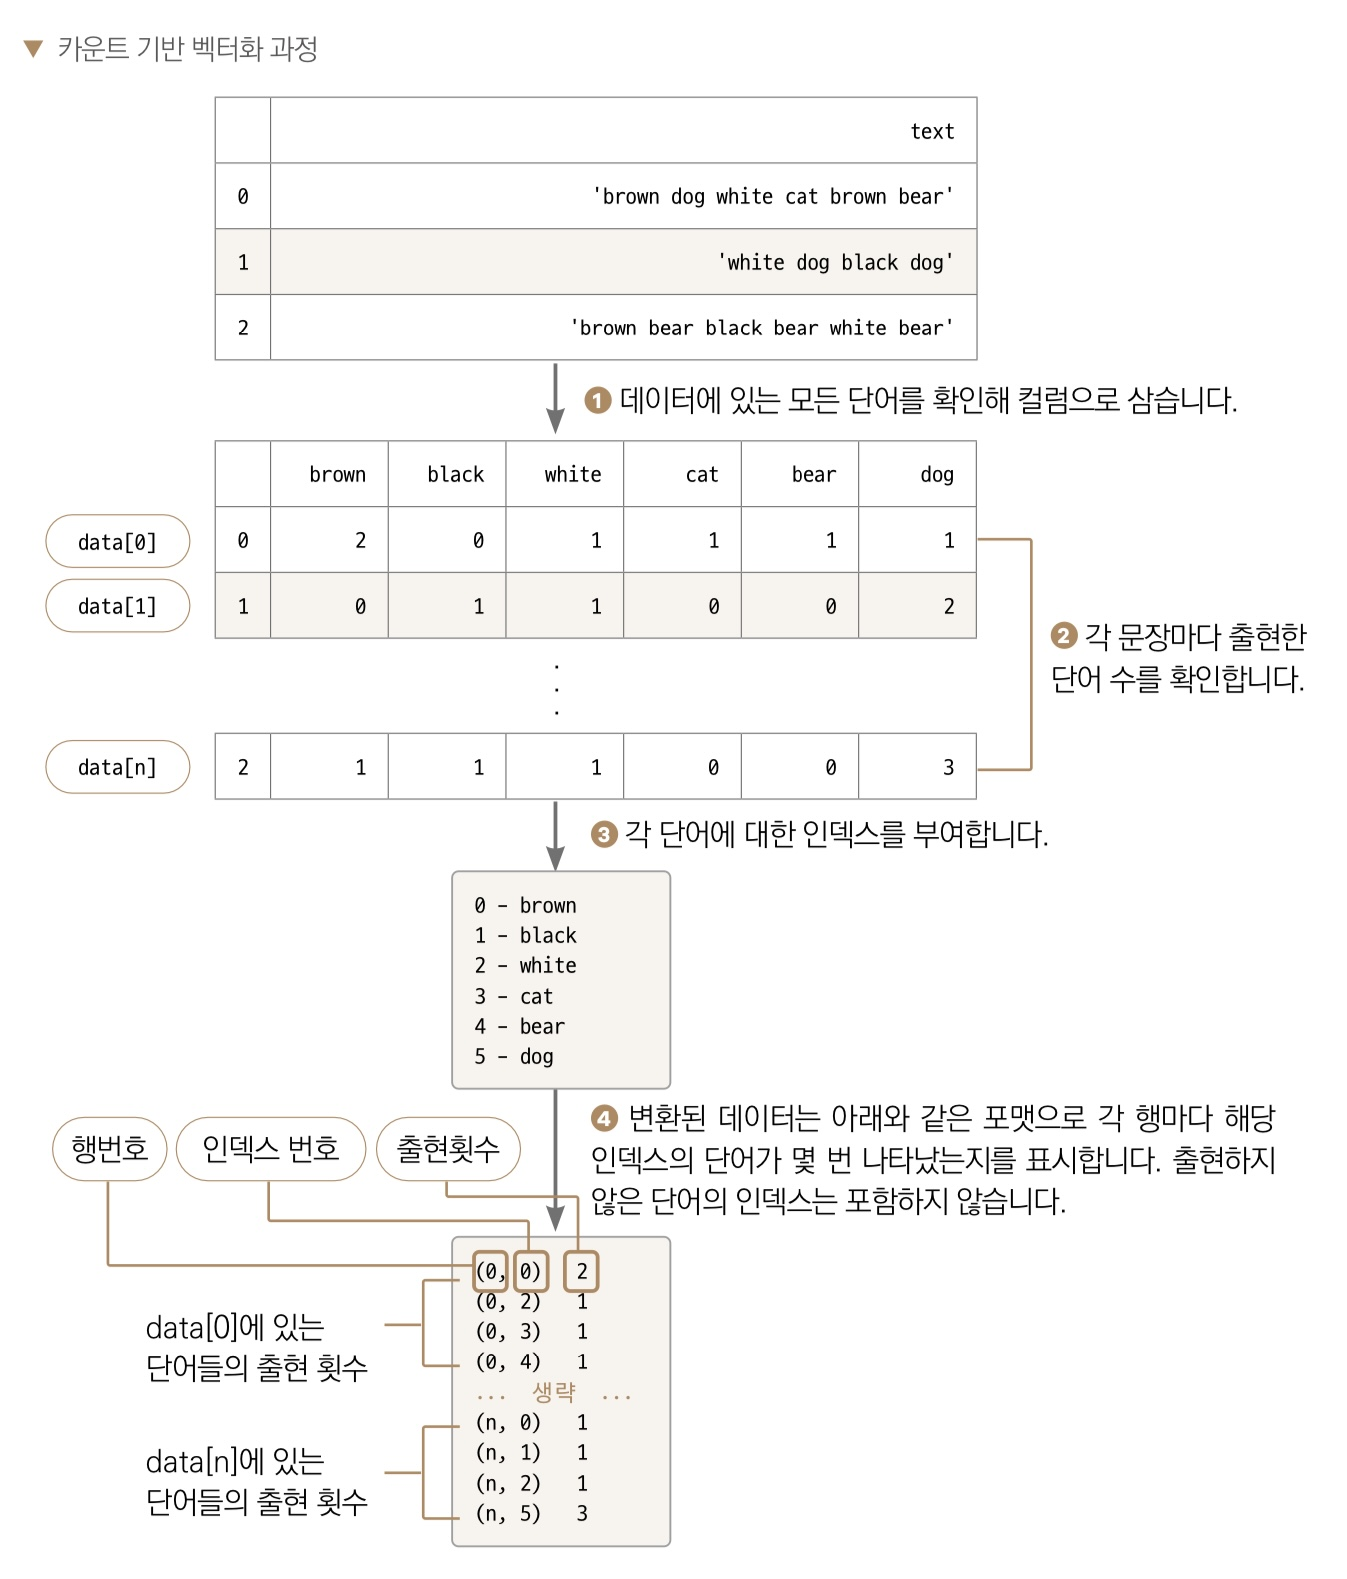

In [79]:
Image('images/8.jpg')

In [80]:
data

,target,text
0,0,go jurong point crazy available bugis n great ...
1,0,ok lar joking wif u oni
2,1,free entry 2 wkly comp win fa cup final tkts 2...
3,0,u dun say early hor u c already say
4,0,nah dont think goes usf lives around though
...,...,...
5569,1,2nd time tried 2 contact u u £750 pound prize ...
5570,0,ü b going esplanade fr home
5571,0,pity mood soany suggestions
5572,0,guy bitching acted like id interested buying s...


In [89]:
x = data["text"] #독립변수
y  = data["target"] #종속변수

In [90]:
from sklearn.feature_extraction.text import CountVectorizer

In [91]:
cv = CountVectorizer() #객체 생성
cv.fit(x) #학습
cv.vocabulary_ #단어와 인덱스 출력

{'go': 3791,
 'jurong': 4687,
 'point': 6433,
 'crazy': 2497,
 'available': 1414,
 'bugis': 1881,
 'great': 3888,
 'world': 9184,
 'la': 4847,
 'buffet': 1879,
 'cine': 2214,
 'got': 3848,
 'amore': 1181,
 'wat': 8947,
 'ok': 5995,
 'lar': 4886,
 'joking': 4655,
 'wif': 9079,
 'oni': 6027,
 'free': 3577,
 'entry': 3160,
 'wkly': 9136,
 'comp': 2330,
 'win': 9093,
 'fa': 3296,
 'cup': 2553,
 'final': 3421,
 'tkts': 8380,
 '21st': 454,
 'may': 5335,
 '2005': 441,
 'text': 8217,
 '87121': 875,
 'receive': 6833,
 'questionstd': 6724,
 'txt': 8592,
 'ratetcs': 6776,
 'apply': 1267,
 '08452810075over18s': 71,
 'dun': 3011,
 'say': 7192,
 'early': 3031,
 'hor': 4222,
 'already': 1154,
 'nah': 5682,
 'dont': 2918,
 'think': 8291,
 'goes': 3805,
 'usf': 8741,
 'lives': 5050,
 'around': 1318,
 'though': 8310,
 'freemsg': 3585,
 'hey': 4118,
 'darling': 2617,
 'weeks': 9002,
 'word': 9170,
 'back': 1464,
 'id': 4343,
 'like': 5000,
 'fun': 3652,
 'still': 7860,
 'tb': 8147,
 'xxx': 9309,
 'std': 

In [92]:
x = cv.transform(x)
print(x) 

#이 데이터는 print를 사용해야 아래와 같은 결과물이 보여집니다.
#결과 값 (데이터 행 번호, 단어의 인덱스 값) 행에서 출현 횟수

  (0, 1181)	1
  (0, 1414)	1
  (0, 1879)	1
  (0, 1881)	1
  (0, 2214)	1
  (0, 2497)	1
  (0, 3791)	1
  (0, 3848)	1
  (0, 3888)	1
  (0, 4687)	1
  (0, 4847)	1
  (0, 6433)	1
  (0, 8947)	1
  (0, 9184)	1
  (1, 4655)	1
  (1, 4886)	1
  (1, 5995)	1
  (1, 6027)	1
  (1, 9079)	1
  (2, 71)	1
  (2, 441)	1
  (2, 454)	1
  (2, 875)	1
  (2, 1267)	1
  (2, 2330)	1
  :	:
  (5570, 3188)	1
  (5570, 3564)	1
  (5570, 3810)	1
  (5570, 4188)	1
  (5571, 5566)	1
  (5571, 6359)	1
  (5571, 7611)	1
  (5571, 7986)	1
  (5572, 999)	1
  (5572, 1665)	1
  (5572, 1916)	1
  (5572, 3103)	1
  (5572, 3577)	1
  (5572, 3701)	1
  (5572, 3950)	1
  (5572, 4343)	1
  (5572, 4480)	1
  (5572, 5000)	1
  (5572, 5777)	1
  (5572, 7636)	1
  (5572, 8731)	1
  (5572, 8997)	1
  (5573, 5688)	1
  (5573, 7052)	1
  (5573, 8538)	1


In [93]:
data.loc[0]['text']

'go jurong point crazy available bugis n great world la e buffet cine got amore wat'

In [94]:
print(cv.vocabulary_['go'])
print(cv.vocabulary_['jurong'])
print(cv.vocabulary_['point'])

3791
4687
6433


7.7 모델링 및 예측/평가하기

In [95]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 100)

In [102]:
from sklearn.naive_bayes import MultinomialNB
#다항 분포에 대한 Naive Bayes 알고르짐이다. 다항 분포 외에 정규분포, 베이르누이분포에 따른 NB모듈도 있으며.
#데이터 분포 득성을 명확히 파악하기 어렵다면 다 사용해서 제일 좋은거 써라. 

In [97]:
model = MultinomialNB()
model.fit(x_train, y_train)
pred = model.predict(x_test)

In [103]:
from sklearn.metrics import accuracy_score, confusion_matrix


confusion_matrix = 행을 실젯값 0과 1, 열을 예측값 0과 1로 두어 2x2 메트릭스를 만든다. 이를 통해 실젯값이 0인데 예측값도 0인 경우, 실제값은 0인데 예측값이 1인경우, 실젯값도 1이고 예측값도 1인경우, 실젯값은 1인데 예측값이 0인 4가지 경우를 보여주는것

confusion_matrix(실제값, 예측값)

In [99]:
accuracy_score(y_test, pred)

#정확한 예측 건수 / 전체 경우의 수
# 955+134 / 955+134+12+4  = .9856...

0.9856502242152466

In [100]:
print(confusion_matrix(y_test, pred))

[[965  12]
 [  4 134]]


<AxesSubplot: >

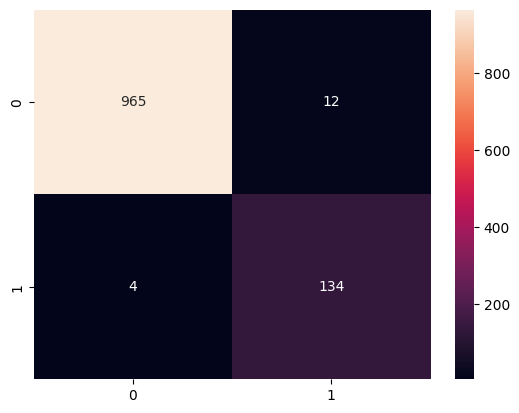

In [101]:
sns.heatmap(confusion_matrix(y_test, pred), annot=True, fmt='.0f')
#0f : 소숫점 이하 없이
#2f : 소숫점 둘째 자리까지

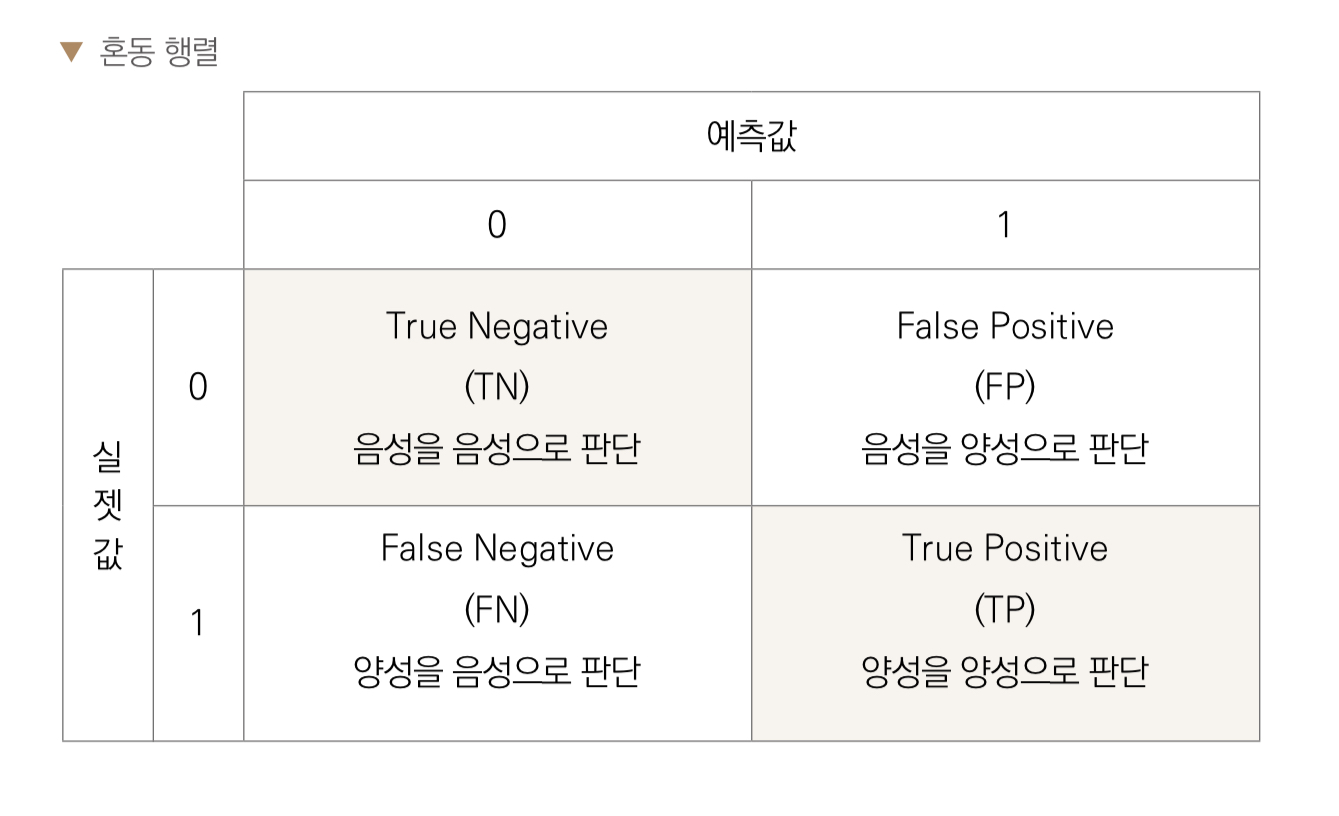

In [108]:
Image('images/9.jpeg')

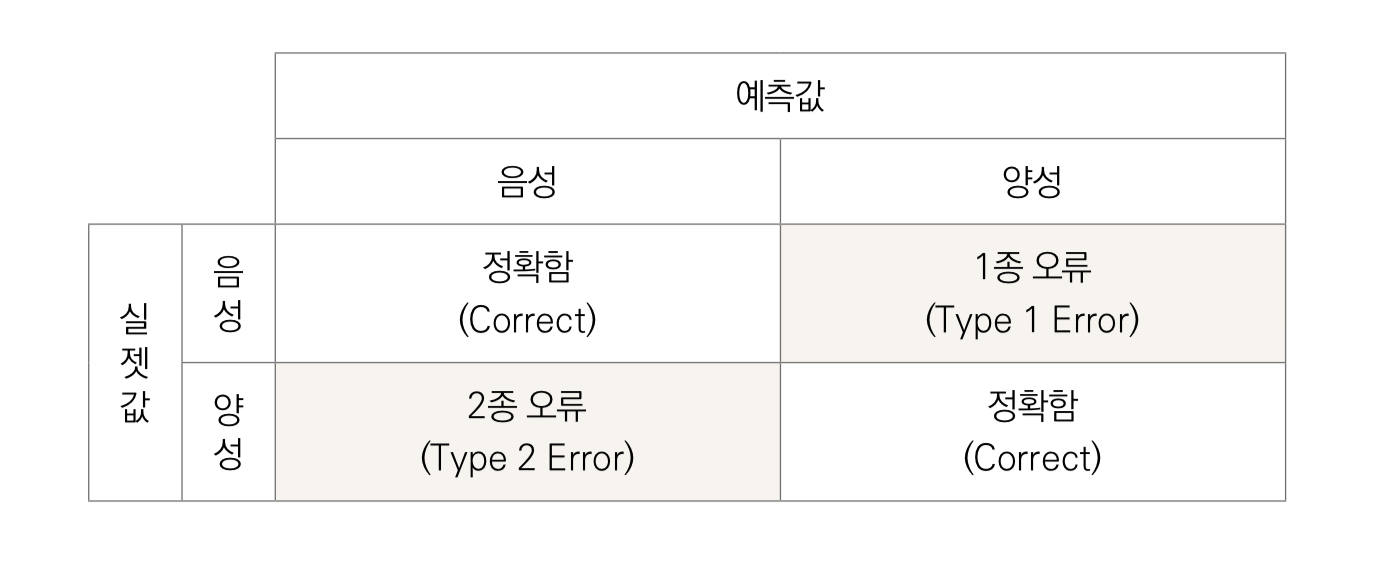

In [109]:
Image('images/10.jpeg')

7.8 나이브 베이즈 모델 

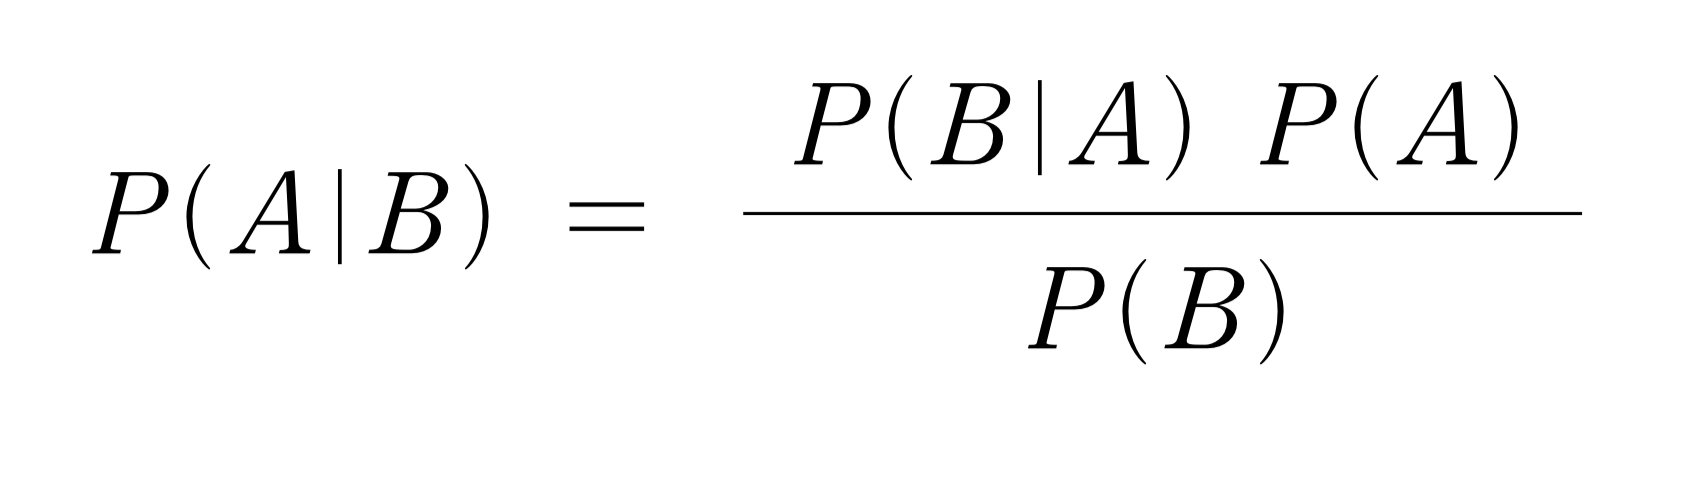

In [111]:
Image('images/11.jpeg')

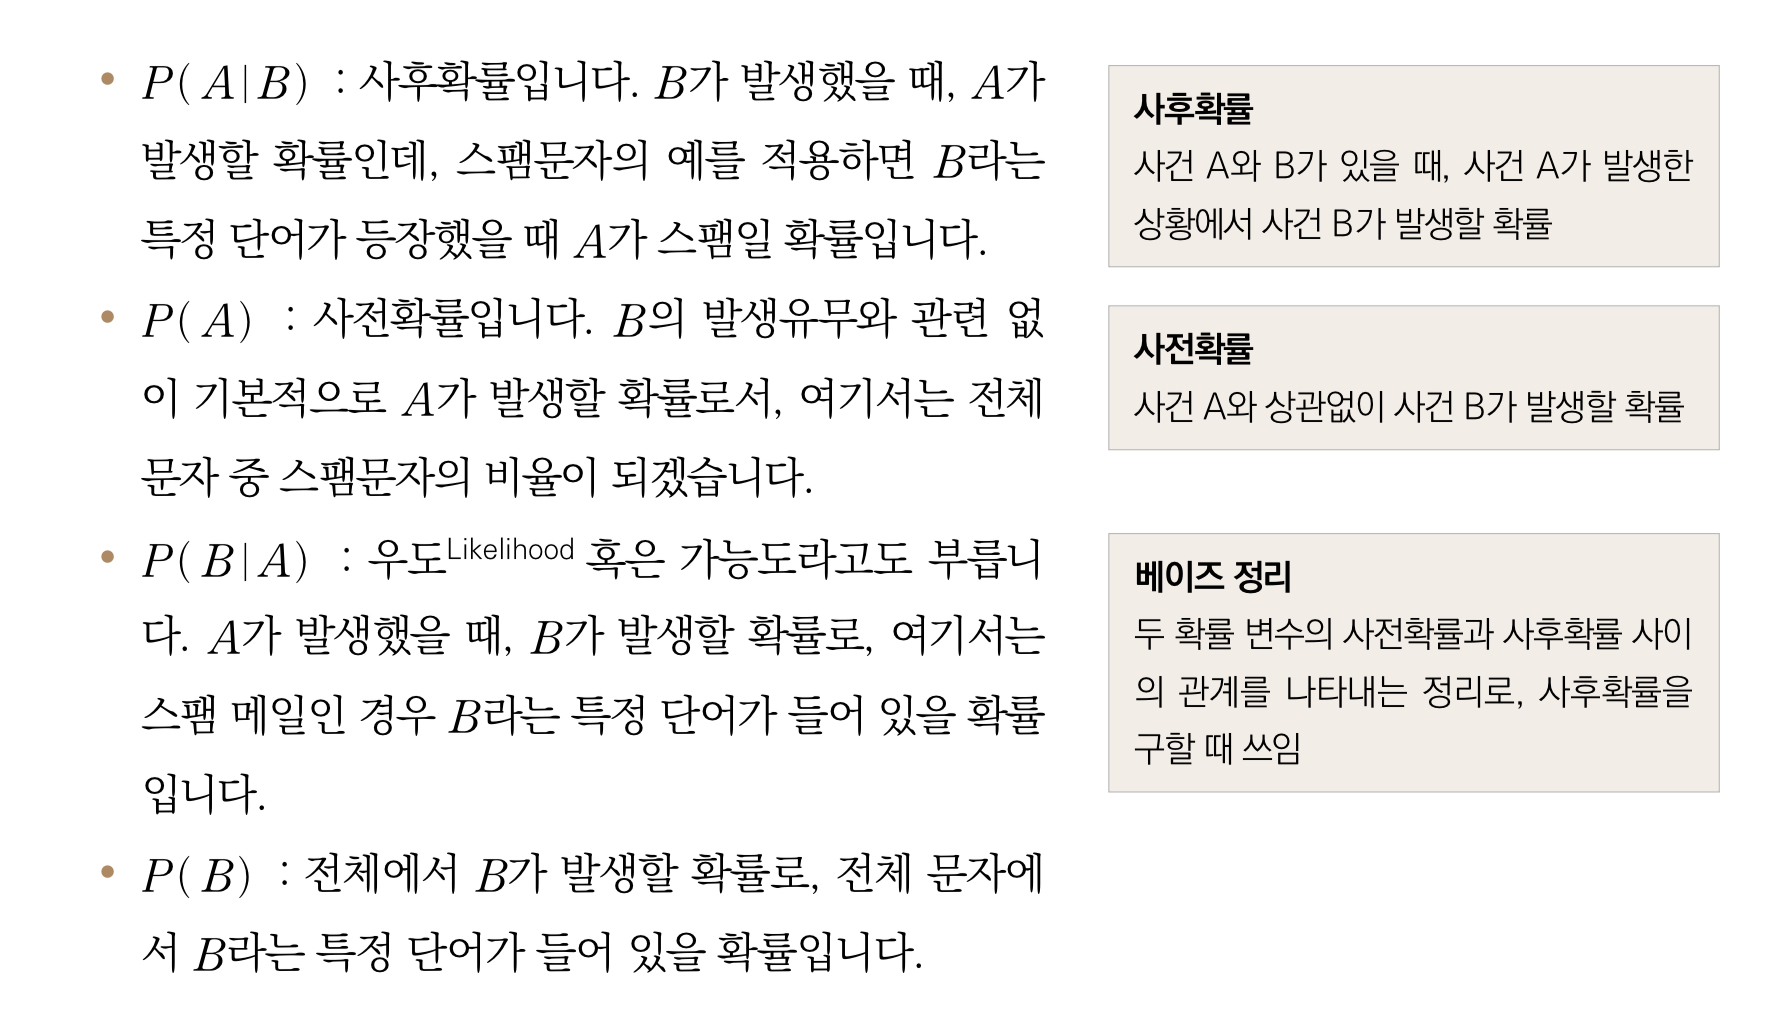

In [113]:
Image('images/13.jpeg')

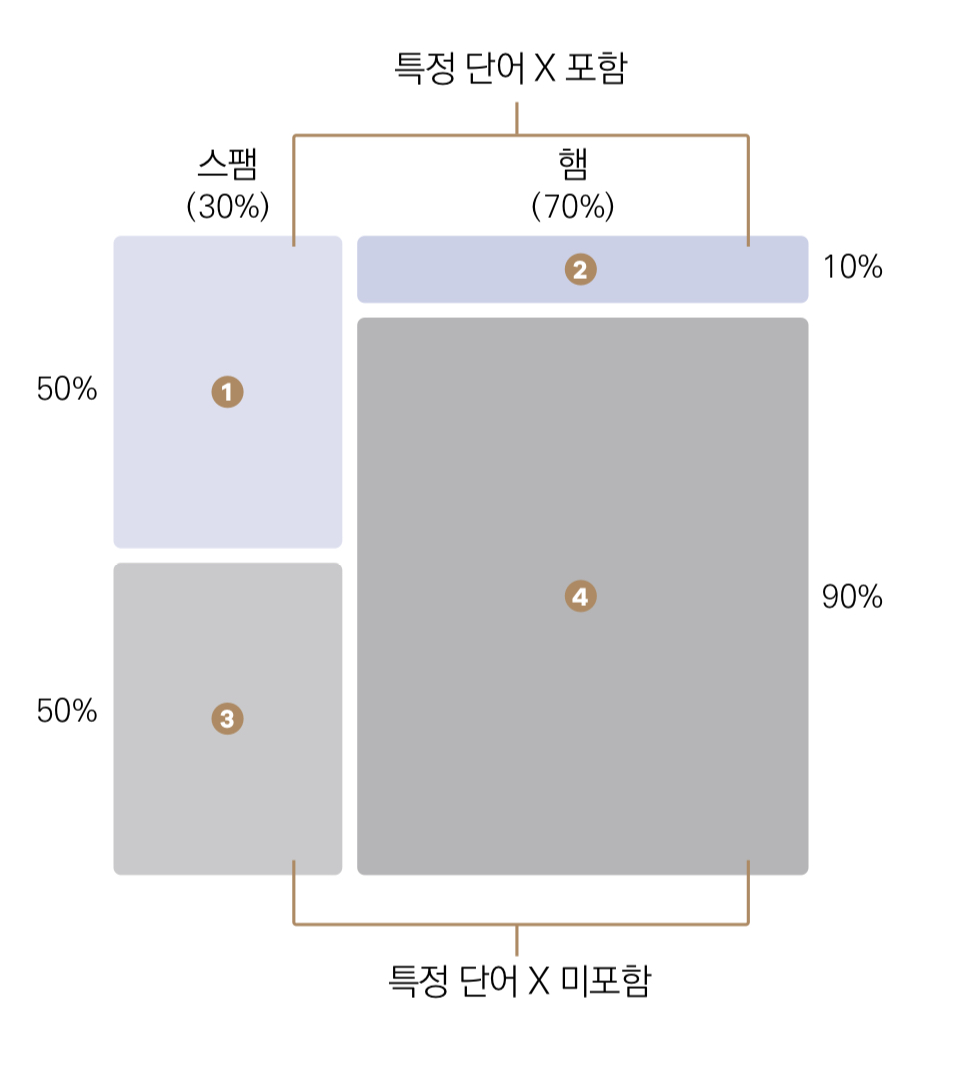

In [112]:
Image('images/12.jpeg')

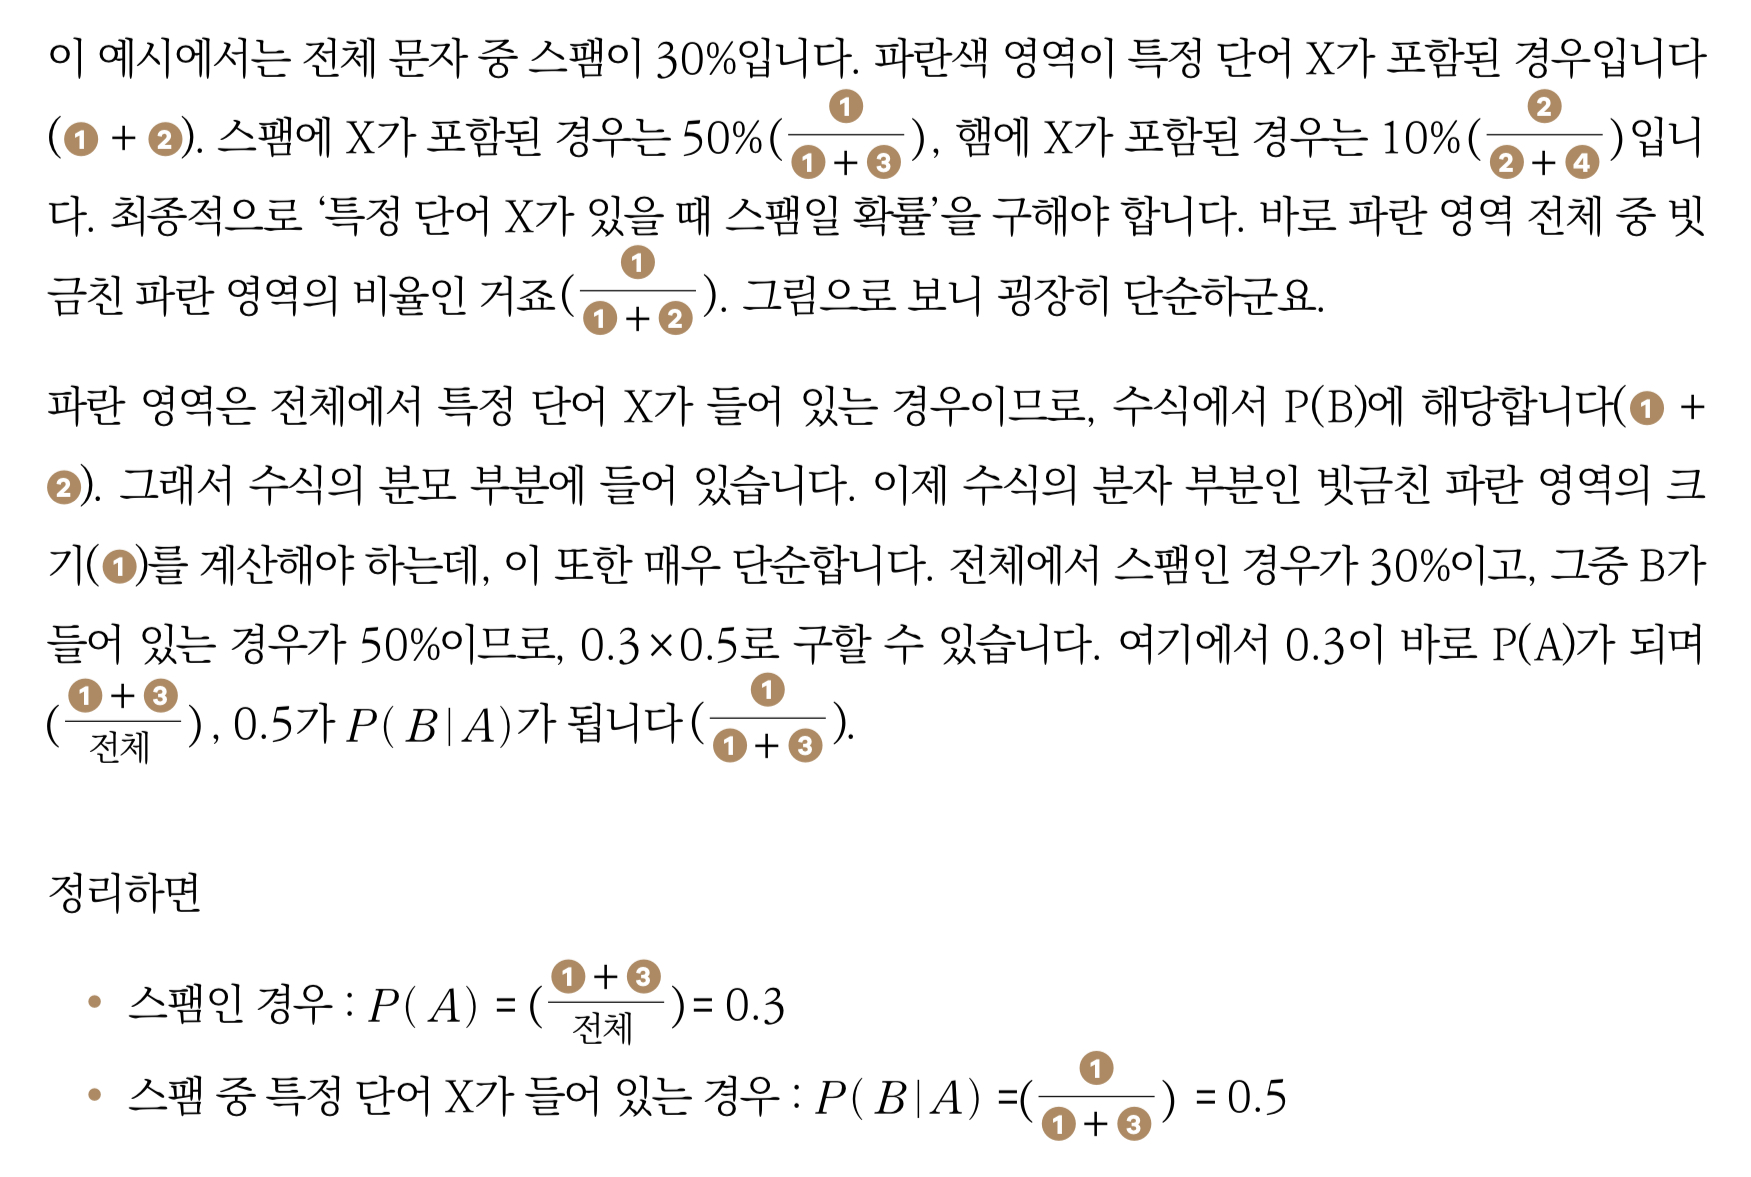

In [114]:
Image('images/14.jpeg')

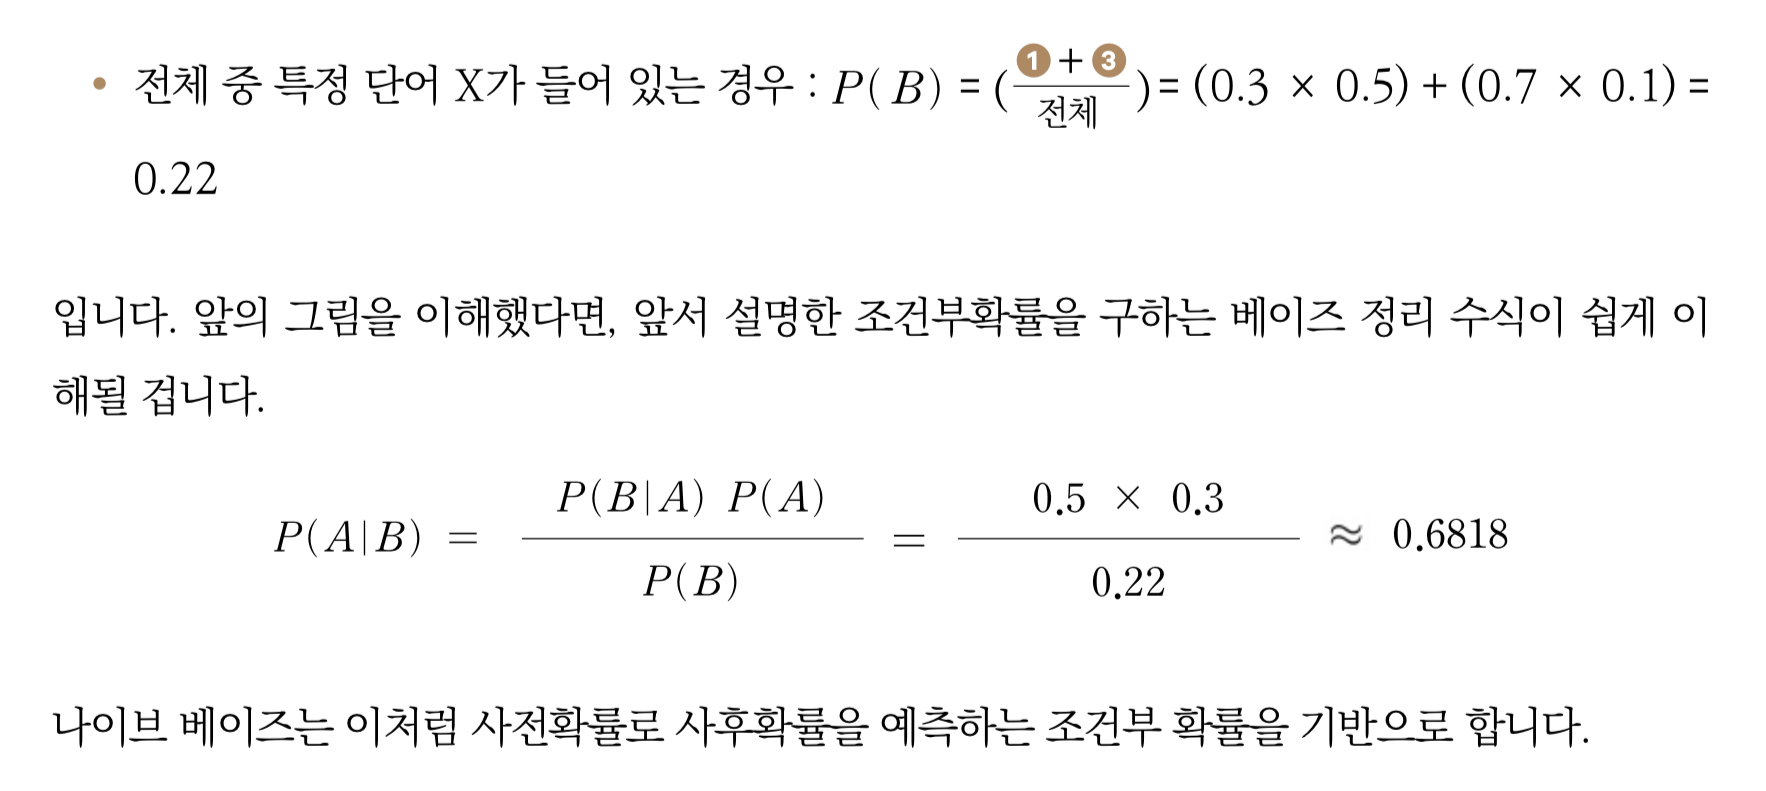

In [115]:
Image('images/15.jpeg')